## 📥 Stock Data Collection

We import `yfinance` and define a list of **10 large-cap stocks** across diverse sectors to ensure **sectoral diversification**.

**Daily adjusted closing prices** are retrieved from **January 1, 2020** to **January 1, 2025**.

+ `auto_adjust=True` applies dividend and split adjustments.
+ `print()` is used to confirm that `"Close"` prices are returned as a DataFrame.

In [1]:
import yfinance as yf
stocks = ["AAPL", "GOOGL", "JPM", "XOM", "NVDA", "TSLA", "PG", "V", "JNJ", "CAT"]
data = yf.download(stocks, start="2020-01-01", end="2025-01-01", auto_adjust=True)
print(type(data["Close"]))

[*********************100%***********************]  10 of 10 completed

<class 'pandas.core.frame.DataFrame'>


### Extracting Adjusted Close Prices

+ We extract and reorder the `"Close"` prices to match the original ticker list. 
+ This ensures a consistent structure for return calculations and portfolio optimization.

In [2]:
close = data["Close"]
close = close[stocks]
close

Ticker,AAPL,GOOGL,JPM,XOM,NVDA,TSLA,PG,V,JNJ,CAT
Date,,,,,,,,,,
2020-01-02,72.620842,68.026016,120.154724,54.634789,5.971748,28.684000,107.016396,183.872040,124.983665,133.256699
2020-01-03,71.914818,67.670158,118.569099,54.195545,5.876163,29.534000,106.296661,182.409698,123.536644,131.406540
2020-01-06,72.487854,69.473839,118.474808,54.611671,5.900805,30.102667,106.444092,182.015259,123.382530,131.318008
2020-01-07,72.146957,69.339653,116.460678,54.164715,5.972245,31.270666,105.785027,181.534195,124.136024,129.582932
2020-01-08,73.307510,69.833176,117.369186,53.347900,5.983446,32.809334,106.235962,184.641708,124.118858,130.733749
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.578674,195.647552,238.440521,104.494308,140.197372,462.279999,165.742447,319.580597,143.461914,363.142181
2024-12-26,258.396667,195.138748,239.257263,104.582695,139.907410,454.130005,166.939362,319.839752,143.196320,362.697632
2024-12-27,254.974930,192.305435,237.318726,104.572876,136.987869,431.660004,166.321289,317.597229,142.675018,360.464844


Calculate daily percentage returns from adjusted close prices and remove any missing rows.

In [3]:
returns = close.pct_change(fill_method=None).dropna(how="all")
returns

Ticker,AAPL,GOOGL,JPM,XOM,NVDA,TSLA,PG,V,JNJ,CAT
Date,,,,,,,,,,
2020-01-03,-0.009722,-0.005231,-0.013197,-0.008040,-0.016006,0.029633,-0.006725,-0.007953,-0.011578,-0.013884
2020-01-06,0.007968,0.026654,-0.000795,0.007678,0.004194,0.019255,0.001387,-0.002162,-0.001248,-0.000674
2020-01-07,-0.004703,-0.001931,-0.017000,-0.008184,0.012107,0.038801,-0.006192,-0.002643,0.006107,-0.013213
2020-01-08,0.016086,0.007117,0.007801,-0.015080,0.001876,0.049205,0.004263,0.017118,-0.000138,0.008881
2020-01-09,0.021241,0.010498,0.003651,0.007656,0.010982,-0.021945,0.010938,0.006930,0.002967,-0.002505
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011478,0.007604,0.016444,0.000941,0.003938,0.073572,0.004937,0.010813,0.003993,0.005966
2024-12-26,0.003176,-0.002601,0.003425,0.000846,-0.002068,-0.017630,0.007222,0.000811,-0.001851,-0.001224
2024-12-27,-0.013242,-0.014519,-0.008102,-0.000094,-0.020868,-0.049479,-0.003702,-0.007011,-0.003640,-0.006156


Generate summary statistics (mean, std, min, max, quartiles) for daily returns to assess distribution and volatility patterns.

In [4]:
returns.describe().round(4)

Ticker,AAPL,GOOGL,JPM,XOM,NVDA,TSLA,PG,V,JNJ,CAT
count,1257.0000,1257.0000,1257.0000,1257.0000,1257.0000,1257.0000,1257.0000,1257.0000,1257.0000,1257.0000
mean,0.0012,0.0010,0.0007,0.0008,0.0030,0.0030,0.0004,0.0006,0.0002,0.0010
std,0.0200,0.0205,0.0205,0.0217,0.0339,0.0423,0.0132,0.0176,0.0124,0.0205
min,-0.1286,-0.1163,-0.1496,-0.1222,-0.1845,-0.2106,-0.0874,-0.1355,-0.0730,-0.1428
25%,-0.0084,-0.0095,-0.0084,-0.0109,-0.0160,-0.0201,-0.0055,-0.0077,-0.0057,-0.0097
50%,0.0012,0.0018,0.0007,0.0002,0.0033,0.0019,0.0007,0.0013,0.0001,0.0010
75%,0.0120,0.0114,0.0099,0.0121,0.0223,0.0238,0.0069,0.0088,0.0059,0.0118
max,0.1198,0.1022,0.1801,0.1269,0.2437,0.2192,0.1201,0.1384,0.0800,0.1033


Calculate annualized expected returns by multiplying daily means by 252 trading days.

In [5]:
mu_annual = returns.mean() * 252
mu_annual

Ticker
AAPL     0.297892
GOOGL    0.257608
JPM      0.187930
XOM      0.191290
NVDA     0.768566
TSLA     0.755347
PG       0.108038
V        0.146714
JNJ      0.045193
CAT      0.251283
dtype: float64

Convert annualized returns to percentage format and round to two decimals for better readability.

In [6]:
(mu_annual * 100).round(2)

Ticker
AAPL     29.79
GOOGL    25.76
JPM      18.79
XOM      19.13
NVDA     76.86
TSLA     75.53
PG       10.80
V        14.67
JNJ       4.52
CAT      25.13
dtype: float64

Calculate the standard deviation of daily returns (%) to assess individual stock volatility.

In [7]:
std_dev_pct = (returns.std() * 100).round(2)
print("Standard Deviation of Daily Returns (%):")
print(std_dev_pct)

Standard Deviation of Daily Returns (%):
Ticker
AAPL     2.00
GOOGL    2.05
JPM      2.05
XOM      2.17
NVDA     3.39
TSLA     4.23
PG       1.32
V        1.76
JNJ      1.24
CAT      2.05
dtype: float64


### Annualized Covariance Matrix

Compute the annualized return covariance matrix and visualize pairwise co-movements using a heatmap.

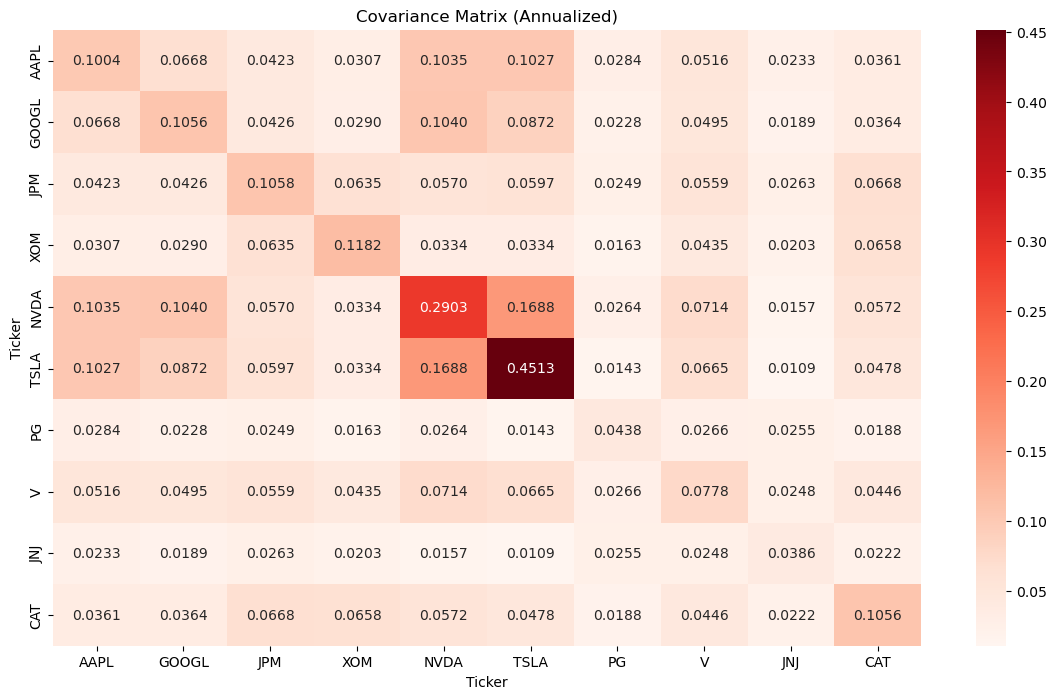

In [8]:
import seaborn as sns
cov_annual = returns.cov() * 252
cov_annual

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.heatmap(cov_annual, annot=True, fmt=".4f", cmap="Reds")
plt.title("Covariance Matrix (Annualized)")
plt.show()

## 🎯 Minimum Variance Portfolio (MVP)

We construct the minimum variance portfolio by solving a constrained optimization problem:

- **Objective**: Minimize portfolio variance.  
- **Constraints**:
  - Fully invested portfolio (weights sum to 1)
  - No short-selling (weights are bounded between 0 and 1)

The optimization is solved using `scipy.optimize.minimize` with the Sequential Least Squares Programming (SLSQP) method. The SLSQP algorithm is well-suited for this problem as it supports both equality (i.e., weights summing to 1) and inequality constraints (i.e., no short-selling with bounds between 0 and 1).

In [9]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

n = len(stocks)

# Initial guess
w0 = np.ones(n) / n

# Objective function: portfolio variance
def portfolio_variance(w, cov_matrix):
    return w.T @ cov_matrix @ w

# Constraints
constraints = ({
    'type': 'eq',
    'fun': lambda w: np.sum(w) - 1
})

# Bounds
bounds = [(0.0, 1.0) for _ in range(n)]

# Optimization
result = minimize(
    fun = portfolio_variance,
    x0 = w0,
    args = (cov_annual,),
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)

w_mvp = pd.Series(result.x, index = stocks)

Display the optimal asset weights from MVP and compute the portfolio’s annualized volatility (%), derived from the minimized variance.

In [10]:
print(f"Minimum Variance Portfolio Weights:\n{w_mvp.round(4)}")
print(f"\nAnnual Portfolio Volatility : {round(np.sqrt(portfolio_variance(w_mvp, cov_annual.values)) * 100, 4)} %")

Minimum Variance Portfolio Weights:
AAPL     0.0000
GOOGL    0.0800
JPM      0.0000
XOM      0.0830
NVDA     0.0000
TSLA     0.0190
PG       0.3269
V        0.0000
JNJ      0.4463
CAT      0.0447
dtype: float64

Annual Portfolio Volatility : 17.3176 %


### Expected Returns & Covariance (PyPortfolioOpt)

+ Estimate expected returns using `mean_historical_return()` from PyPortfolioOpt (non-compounded version). 
+ Compute the annualized sample covariance matrix using `risk_matrix()`.

These functions are part of the `PyPortfolioOpt` library, which simplifies portfolio optimization workflows by providing pre-built, well-tested methods for return and risk estimation.

In [11]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import risk_matrix

mu = mean_historical_return(close, compounding=False)
S = risk_matrix(close, method="sample_cov")

### Manual vs. PyPortfolioOpt Returns

+ Visualize and compare manually calculated expected returns with those estimated by `PyPortfolioOpt`.
+ Both methods use historical daily returns but may differ slightly due to internal handling of missing data, weighting, or assumptions.

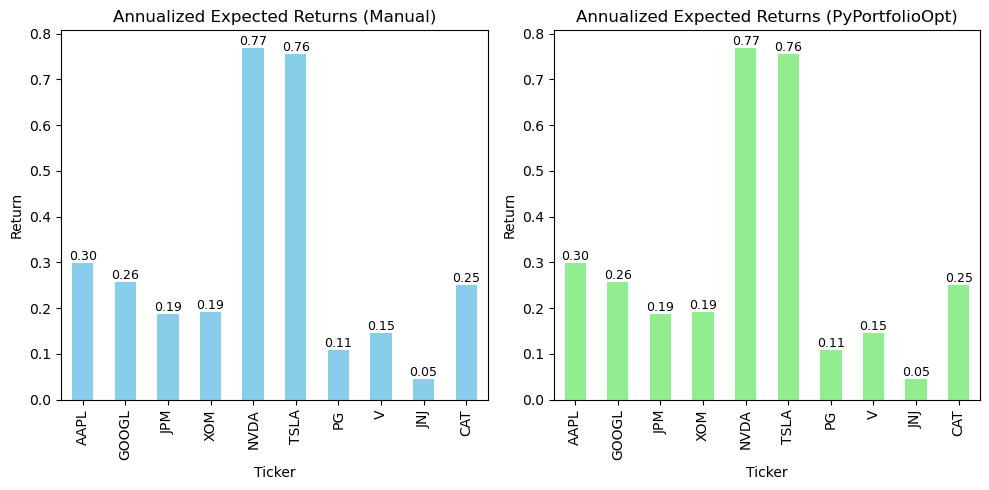

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

mu_annual.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Annualized Expected Returns (Manual)')
axes[0].set_ylabel('Return')
axes[0].set_xlabel('Ticker')

mu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Annualized Expected Returns (PyPortfolioOpt)')
axes[1].set_ylabel('Return')
axes[1].set_xlabel('Ticker')

# Annotate bars with their values
for ax, series in zip(axes, [mu_annual, mu]):
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f"{value:.2f}", 
                    (p.get_x() + p.get_width() / 2, value), 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**🔎Note:** The two methods yield very similar results, confirming the validity of our manual computation.

### Covariance Matrix Comparison

Visualize and compare the annualized covariance matrices:

- **Left**: Manually computed using `.cov()` × 252  
- **Right**: Generated using `risk_matrix()` from PyPortfolioOpt with `sample_cov` method  

This comparison checks for consistency in risk modeling between manual and library-based methods.

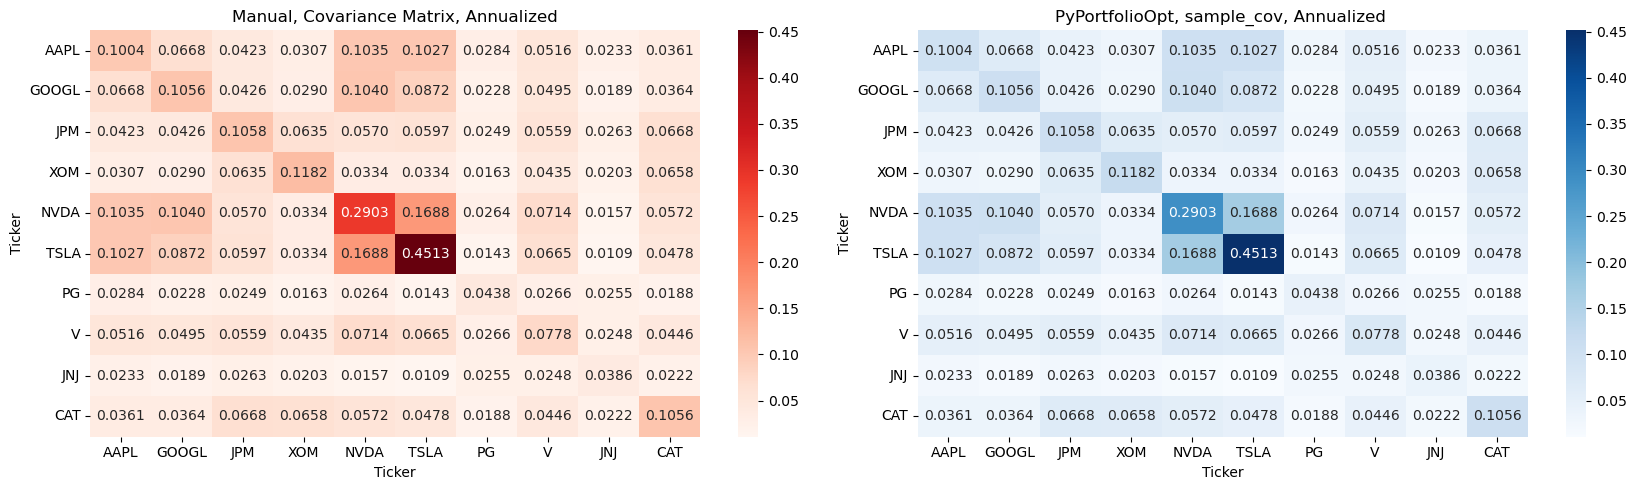

In [13]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(17, 5))

sns.heatmap(cov_annual, annot=True, fmt=".4f", cmap="Reds", ax=axes[0])
axes[0].set_title("Manual, Covariance Matrix, Annualized")

sns.heatmap(S, annot=True, fmt=".4f", cmap="Blues", ax=axes[1])
axes[1].set_title("PyPortfolioOpt, sample_cov, Annualized ")

plt.tight_layout()
plt.show()

### MVP via PyPortfolioOpt

+ Use the `EfficientFrontier` class from `PyPortfolioOpt` to compute the minimum variance portfolio.  
+ The optimizer takes expected returns and the sample covariance matrix as input and returns cleaned weight allocations.

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
ef_mvp = EfficientFrontier(mu, S)
weights = ef_mvp.min_volatility()
cleaned_weights_mvp = ef_mvp.clean_weights()

### MVP Weight Comparison

+ Compare the asset allocations between the manually optimized minimum variance portfolio and the one computed using `PyPortfolioOpt`.  
+ Bar plots allow visual verification of consistency between the two methods.

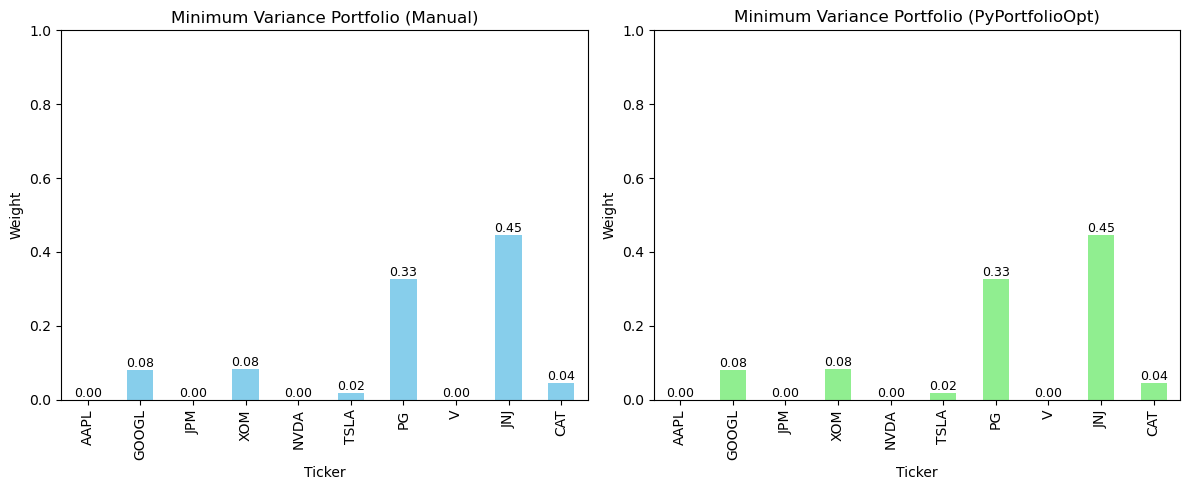

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot manual MVP weights
w_mvp.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Minimum Variance Portfolio (Manual)')
axes[0].set_ylabel('Weight')
axes[0].set_xlabel('Ticker')
axes[0].set_ylim(0, 1)

# Plot PyPortfolioOpt cleaned weights, sorted by ticker name
pd.Series(cleaned_weights_mvp).plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Minimum Variance Portfolio (PyPortfolioOpt)')
axes[1].set_ylabel('Weight')
axes[1].set_xlabel('Ticker')
axes[1].set_ylim(0, 1)

for ax, series in zip(axes, [w_mvp, pd.Series(cleaned_weights_mvp)]):
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f"{value:.2f}", 
                    (p.get_x() + p.get_width() / 2, value), 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**🔎 Note:** Both portfolios assign higher weights to lower-volatility stocks, as expected. Minor differences may stem from solver precision and rounding behavior.

### MVP Portfolio Volatility

Compute and compare the annualized volatility (standard deviation) of both minimum variance portfolios:  
+ Manual optimization using custom code and `cov_annual`  
+ `PyPortfolioOpt` solution using `S` (sample covariance)

Both results are nearly identical, confirming consistency between implementations.

In [16]:
print(f"\nAnnual Portfolio Volatility : {round(np.sqrt(portfolio_variance(w_mvp, cov_annual.values)) * 100, 4)} %")
print(f"\nAnnual Portfolio Volatility : {round(np.sqrt(portfolio_variance(pd.Series(cleaned_weights_mvp), S.values)) * 100, 4)} %")


Annual Portfolio Volatility : 17.3176 %

Annual Portfolio Volatility : 17.3177 %


## 🚀 Maximum Sharpe Ratio Portfolio (MSRP)

Construct the maximum Sharpe ratio portfolio by maximizing risk-adjusted return:  
- **Objective**: Maximize the Sharpe ratio (equivalent to minimizing its negative)  
- **Excess Return**: Calculated using an annualized risk-free rate of 3%  
- **Constraints**:  
  - Portfolio must be fully invested (sum of weights = 1)  
  - No short-selling (weights between 0 and 1)

Optimization is performed using `scipy.optimize.minimize` with the SLSQP method.

In [17]:
risk_free_rate = 0.03

# Excess return
excess_mu = mu_annual - risk_free_rate  # both must be annual

# Initial guess
w0 = np.ones(n) / n

# Sharpe ratio objective (we minimize negative Sharpe)
def negative_sharpe(w, excess_mu, cov_matrix):
    portfolio_return = np.dot(w, excess_mu)
    portfolio_std = np.sqrt(w.T @ cov_matrix @ w)
    return -portfolio_return / portfolio_std

# Constraints: weights sum to 1
constraints = ({
    'type': 'eq',
    'fun': lambda w: np.sum(w) - 1
})

# Bounds: long-only portfolio
bounds = [(0.0, 1.0) for _ in range(n)]

# Optimization
result = minimize(
    fun = negative_sharpe,
    x0 = w0,
    args = (excess_mu, cov_annual),
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)

w_msrp = pd.Series(result.x, index = stocks)

### MSRP via PyPortfolioOpt

+ Use `PyPortfolioOpt`’s `EfficientFrontier` class to compute the maximum Sharpe ratio portfolio.  

The library handles the optimization internally based on expected returns, sample covariance matrix, and a user-defined risk-free rate.

In [18]:
ef_msrp = EfficientFrontier(mu, S)
weights = ef_msrp.max_sharpe(risk_free_rate=0.03)
cleaned_weights_msrp = ef_msrp.clean_weights()

### MSRP Weight Comparison

+ Visualize and compare the asset allocations between the manually optimized MSRP and the one computed using PyPortfolioOpt.  
+ Bar plots provide an intuitive view of differences in portfolio composition.

Both portfolios tend to overweight high-return and low-volatility assets. Minor deviations may result from solver settings, convergence tolerance, or internal handling of numerical precision by `PyPortfolioOpt`.

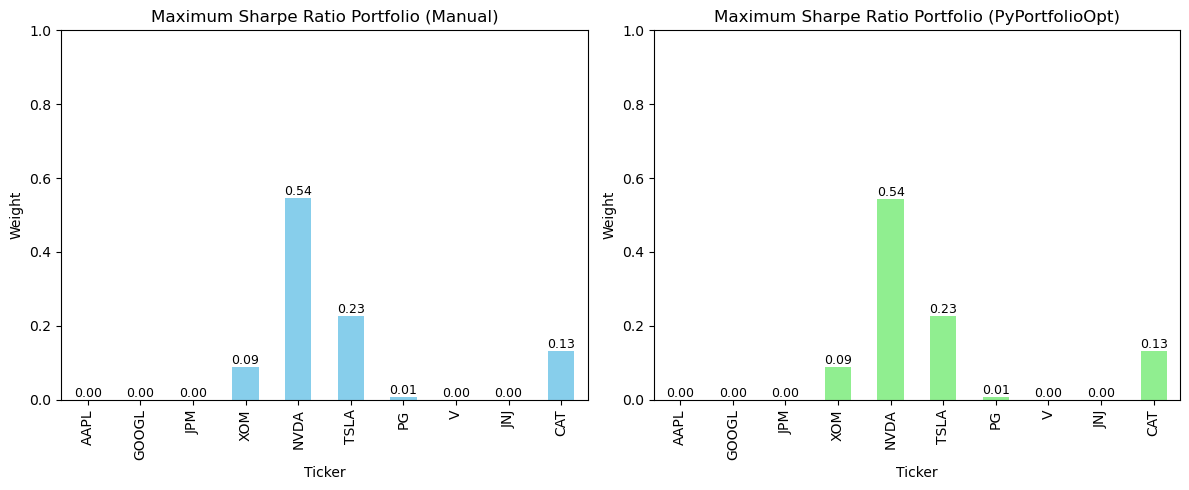

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot manual MVP weights
w_msrp.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Maximum Sharpe Ratio Portfolio (Manual)')
axes[0].set_ylabel('Weight')
axes[0].set_xlabel('Ticker')
axes[0].set_ylim(0, 1)

# Plot PyPortfolioOpt cleaned weights, sorted by ticker name
pd.Series(cleaned_weights_msrp).plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Maximum Sharpe Ratio Portfolio (PyPortfolioOpt)')
axes[1].set_ylabel('Weight')
axes[1].set_xlabel('Ticker')
axes[1].set_ylim(0, 1)

for ax, series in zip(axes, [w_msrp, pd.Series(cleaned_weights_msrp)]):
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f"{value:.2f}", 
                    (p.get_x() + p.get_width() / 2, value), 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**🔍 Note:** The manually computed and PyPortfolioOpt portfolios assign very similar weights, confirming validity of our computation.

### MSRP Weights & Portfolio Volatility

+ Display the optimized asset weights for the maximum Sharpe ratio portfolio, both manually calculated and via `PyPortfolioOpt`.
+ Then compute and compare the corresponding annualized portfolio volatility (%).

In [20]:
print("Minimum Variance Portfolio Weights (%):")
print((w_mvp * 100).round(2))

print("\nMaximum Sharpe Ratio Portfolio Weights (%):")
print((w_msrp * 100).round(2))

Minimum Variance Portfolio Weights (%):
AAPL      0.00
GOOGL     8.00
JPM       0.00
XOM       8.30
NVDA      0.00
TSLA      1.90
PG       32.69
V         0.00
JNJ      44.63
CAT       4.47
dtype: float64

Maximum Sharpe Ratio Portfolio Weights (%):
AAPL      0.00
GOOGL     0.00
JPM       0.00
XOM       8.94
NVDA     54.48
TSLA     22.57
PG        0.69
V         0.00
JNJ       0.00
CAT      13.32
dtype: float64


In [21]:
print(f"\nAnnual Portfolio Volatility : {round(np.sqrt(portfolio_variance(w_msrp, cov_annual.values)) * 100, 4)} %")
print(f"\nAnnual Portfolio Volatility : {round(np.sqrt(portfolio_variance(pd.Series(cleaned_weights_msrp), S.values)) * 100, 4)} %")


Annual Portfolio Volatility : 41.3668 %

Annual Portfolio Volatility : 41.3473 %
